In [1]:
import os, sys
sys.path.append("../")

from idlescape import Smithing, Character

In [2]:
player = Character()
forge = Smithing(player, "../idlescape/data/forges.json")

(0.0, 58.30081063135344)

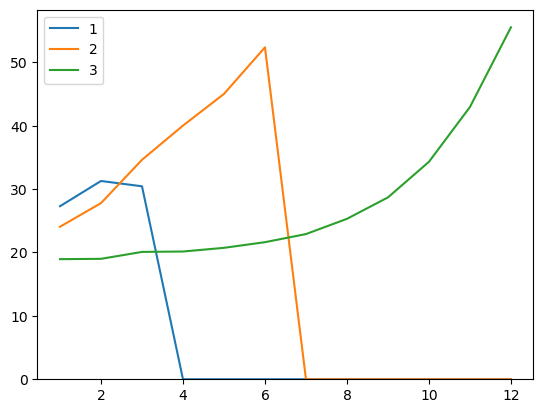

In [26]:
cost_sheet = {'Heat': 10.0, 'Stygian Ore': 3500, 'Ichor': 1200}
opportunity = 2e6/3600

cost_sheet = {'Heat': 0.06, 'Stygian Ore': 27.5, 'Ichor': 24, 'Runite Ore': 1.0, 'Void Stone': 80.0, 'Gold Ore': 1.0, 'Iron Ore': 5.0}
opportunity = 1
def make_plot(name, select='3'):
    uid = player.get_item_by_name(name)['id']
    ival = np.arange(1,13,1)
    ret_val = []
    for iv in ival:
        info = forge.information(select, uid, iv)
        if info is not None:
            cost = sum([ cost_sheet.get(k, 0) * v for (k, v) in info['cost'].items() ]) + opportunity * info['time']
            value = cost / info['output']
            ret_val.append(value)
        else:
            ret_val.append(0)
    return ival, np.array(ret_val)
    
plt.plot( *make_plot('Iron Bar', '1'), label='1' )
plt.plot( *make_plot('Iron Bar', '2'), label='2' )
plt.plot( *make_plot('Iron Bar', '3'), label='3' )
plt.legend()
plt.ylim(bottom=0)